In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
features = pd.read_csv(r'D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\ML Features files\final_features_03092023_2222.csv')

In [3]:
features

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,datatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,EBAN,MANDT,CLNT
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,EBAN,MANDT,CLNT
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,EBAN,MANDT,CLNT
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,EBAN,MANDT,CLNT
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,EBAN,MANDT,CLNT
...,...,...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,BKPF,CURT2,CHAR
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,BKPF,CURT2,CHAR
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,BKPF,CURT2,CHAR
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,BKPF,CURT2,CHAR


In [ ]:
metrics = pd.read_csv(r'D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\ML Features files\final_metrics_03092023_2222.csv')

In [4]:
final_features_GMM = features.copy()

In [4]:
train_data = features.drop(['table_name', 'col_name'], axis=1)
train_data.head()

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,datatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,CLNT
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,CLNT
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,CLNT
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,CLNT
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,CLNT


In [19]:
encoder = LabelEncoder()

In [21]:
# geting an exhaustive set of datatypes from dd03l for datatype encoding to numbers
dd03l = pd.read_csv('D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\DD03L.csv'  , encoding= 'unicode_escape', low_memory= False )

In [23]:
encoder.fit(dd03l['DATATYPE'])
print("Mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Mapping: {' ': 0, 'ACCP': 1, 'CHAR': 2, 'CLNT': 3, 'CUKY': 4, 'CURR': 5, 'D16D': 6, 'D16R': 7, 'D16S': 8, 'D34D': 9, 'D34R': 10, 'D34S': 11, 'DATS': 12, 'DEC': 13, 'FLTP': 14, 'INT1': 15, 'INT2': 16, 'INT4': 17, 'INT8': 18, 'LANG': 19, 'LCHR': 20, 'LRAW': 21, 'NUMC': 22, 'PREC': 23, 'QUAN': 24, 'RAW': 25, 'REF': 26, 'RSTR': 27, 'SSTR': 28, 'STRG': 29, 'STRU': 30, 'TIMS': 31, 'TTYP': 32, 'UNIT': 33}


In [25]:
# Save the mapping to a pkl file
with open('datatype_encoding_mapping.pkl', 'wb') as f:
    pickle.dump(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))), f)

In [5]:
# load the pkl file 
with open('datatype_encoding_mapping.pkl', 'rb') as f:
    datatype_encoding_mapping = pickle.load(f)

In [6]:
# encode the datatype in train data with mapping from pkl
train_data['EncodedDatatype'] = train_data['datatype'].map(datatype_encoding_mapping)
train_data = train_data.drop(['datatype'] , axis =1)

In [7]:
train_data

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,EncodedDatatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,3
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,3
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,3
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,3
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,3
...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,2
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,2
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,2
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,2


# GMM

In [13]:
# Create a GMM model with the chosen number of components
gmm = GaussianMixture(n_components=4)

# Fit the model to your data
gmm.fit(train_data)

GaussianMixture(n_components=4)

In [15]:
cluster_assignments = gmm.predict(train_data) #predict clusters for the columns
final_features_GMM['Cluster'] = cluster_assignments #save clusters assigned to columns

In [16]:
np.unique(final_features_GMM['Cluster'] , return_counts= True)

(array([0, 1, 2, 3], dtype=int64),
 array([5121,  145,   91, 2951], dtype=int64))

In [18]:
# group the data by maximum assignment to improve reliability of result
# Since data has multiple instnances of same column from SAP table, we predict the clusters for all instances
# next we assign the cluster to that column which has been predicted for it the maximum number of times.
# This improves the reliability of the predictions.  
result_df = final_features_GMM.groupby(['table_name', 'col_name'])['Cluster'].apply(lambda x: x.value_counts().idxmax()).reset_index()
result_df.rename(columns={'cluster': 'most_common_cluster'}, inplace=True)

In [20]:
result_df

,table_name,col_name,Cluster
0,BKPF,AEDAT,3
1,BKPF,ARCID,0
2,BKPF,AWKEY,0
3,BKPF,AWTYP,0
4,BKPF,BASW2,0
...,...,...,...
340,VBRK,VTWEG,0
341,VBRK,WAERK,3
342,VBRK,ZLSCH,0
343,VBRK,ZTERM,0


In [24]:
# Define a mapping dictionary
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Use the map function to replace values in the 'clusters' column
result_df['Cluster'] = result_df['Cluster'].map(mapping)


In [25]:
np.unique(result_df['Cluster'] , return_counts= True)

(array(['A', 'B', 'C', 'D'], dtype=object),
 array([207,   6,   3, 129], dtype=int64))

In [26]:
result_df.to_csv('ML_GMM_Clustered_COLS_05092023.csv', index = False )

In [27]:
import joblib

In [28]:
# Save the GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')

# Load the saved GMM model from a file
# loaded_gmm = joblib.load('gmm_model.pkl')

['gmm_model.pkl']

# PCA

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# Step 1: Standardize your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)

In [13]:
# Step 2: Perform PCA
n_components = 8  # Number of features
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

PCA(n_components=8)

In [14]:
# Step 3: Retrieve explained variances
explained_variances = pca.explained_variance_ratio_

# Step 4: Sort features by importance in descending order
feature_importance = list(enumerate(explained_variances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

In [15]:
# Now, 'feature_importance' contains the indices and importance values of features
# in descending order of importance. You can print or use this information as needed.
for idx, importance in feature_importance:
    print(f"Feature {idx}: Importance = {importance:.4f}")

Feature 0: Importance = 0.3041
Feature 1: Importance = 0.2567
Feature 2: Importance = 0.1574
Feature 3: Importance = 0.1177
Feature 4: Importance = 0.1055
Feature 5: Importance = 0.0585
Feature 6: Importance = 0.0000
Feature 7: Importance = 0.0000


# Cluster plot

In [ ]:
# Load the saved GMM model
with open('gmm_model.pkl', 'rb') as file:
    gmm_model = pickle.load(file)

# Assuming you have your data in a variable called 'data'
# Make sure your data has the same number of features (8) as your trained GMM
# You can use the 'predict' method to assign data points to clusters
cluster_assignments = gmm_model.predict(train_data)

# Now, you can create a scatter plot with different colors for each cluster
# You can choose any two features to visualize; for example, features 0 and 1
feature_x = 0  # Replace with the index of the feature you want on the x-axis
feature_y = 1  # Replace with the index of the feature you want on the y-axis

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:, feature_x], train_data[:, feature_y], c=cluster_assignments, cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel(f'Feature {feature_x}')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
plt.show()

In [19]:
from joblib import load


In [21]:
load('gmm_model.pkl')

GaussianMixture(n_components=4)

In [22]:
loaded_gmm = load('gmm_model.pkl')
cluster_assignments = loaded_gmm.predict(train_data)

In [24]:
cluster_assignments

array([3, 3, 3, ..., 0, 0, 3], dtype=int64)

In [35]:
np.unique(cluster_assignments , return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([5121,  145,   91, 2951], dtype=int64))

In [29]:
train_data

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,EncodedDatatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,3
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,3
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,3
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,3
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,3
...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,2
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,2
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,2
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,2


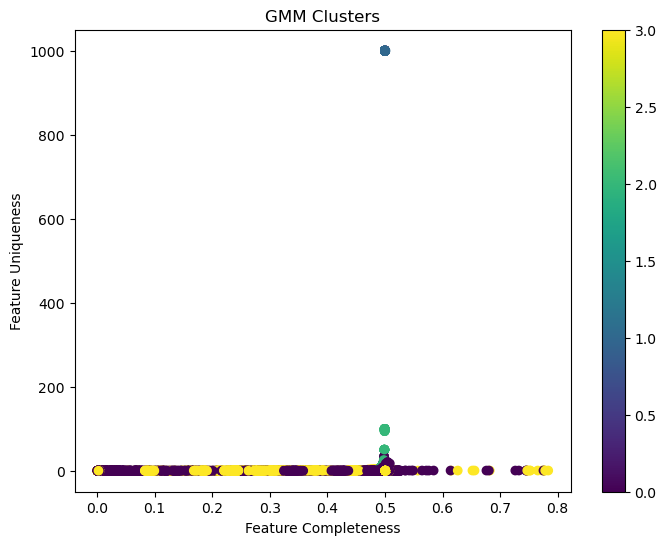

In [39]:
# Now, you can create a scatter plot with different colors for each cluster
# You can choose any two features to visualize; for example, features 0 and 1
feature_x = 'Completeness'	  # Replace with the index of the feature you want on the x-axis
feature_y = 'Uniqueness' # Replace with the index of the feature you want on the y-axis

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data[feature_x], train_data[feature_y], c=cluster_assignments)
plt.title('GMM Clusters')
plt.xlabel(f'Feature {feature_x}')
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

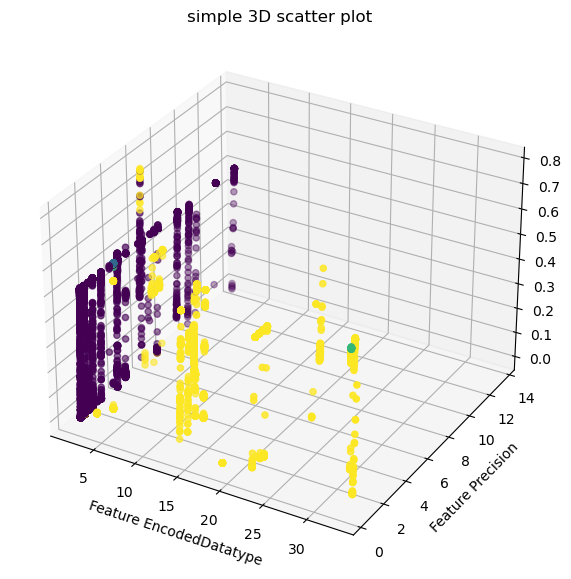

In [51]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
feature_z = 'Completeness'	  # Replace with the index of the feature you want on the x-axis
feature_y = 'Precision'
feature_x = 'EncodedDatatype'
# Creating plot
ax.scatter3D(train_data[feature_x], train_data[feature_y], train_data[feature_z],c=cluster_assignments, cmap='viridis')
plt.title("simple 3D scatter plot")
plt.xlabel(f'Feature {feature_x}')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
# plt.zlabel(f'Feature {feature_z}')
# show plot
plt.show()